In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [53]:
data_df=pd.read_csv(r'C:\Users\wlpch\Documents\sab\house-prices-advanced-regression-techniques\train.csv')

In [54]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [55]:
null_columns=data_df.columns[data_df.isnull().any()]
data_df[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [56]:
data_df.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [57]:
null_columns=data_df.columns[data_df.isnull().any()]
data_df[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   FireplaceQu   770 non-null    object 
 10  GarageType    1379 non-null   object 
 11  GarageYrBlt   1379 non-null   float64
 12  GarageFinish  1379 non-null   object 
 13  GarageQual    1379 non-null   object 
 14  GarageCond    1379 non-null   object 
dtypes: float64(3), object(12)
memory usage: 171.2+ KB


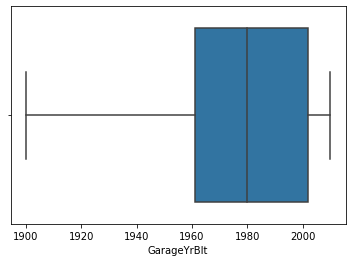

In [7]:
ax=sns.boxplot(x=data_df['GarageYrBlt'])

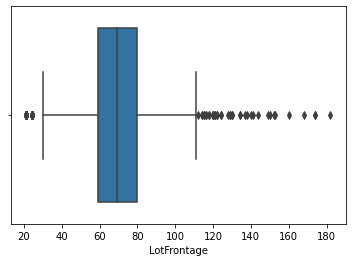

In [8]:
ax=sns.boxplot(x=data_df[data_df['LotFrontage']<200]['LotFrontage'])

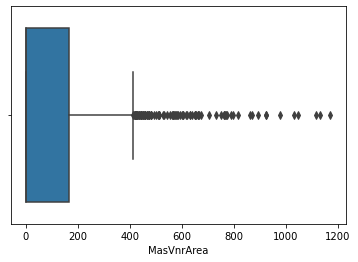

In [9]:
ax=sns.boxplot(x=data_df[data_df['MasVnrArea']<1300]['MasVnrArea'])

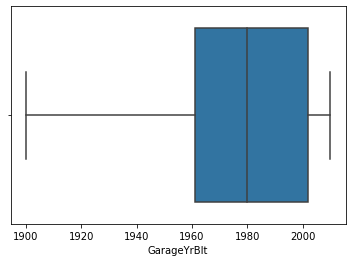

In [10]:
ax=sns.boxplot(x=data_df['GarageYrBlt'])

In [58]:
data_df['GarageYrBlt']=data_df['GarageYrBlt'].fillna(value=data_df['GarageYrBlt'].mode()[0]).astype(int)

In [59]:
data_df=data_df.sort_values(by=['GarageYrBlt','SalePrice'])

In [60]:
data_df['MasVnrArea']=data_df['MasVnrArea'].fillna(method='bfill')
data_df['MasVnrArea']=data_df['MasVnrArea'].fillna(method='ffill')
data_df['MasVnrType']=data_df['MasVnrType'].fillna(method='bfill')
data_df['MasVnrType']=data_df['MasVnrType'].fillna(method='ffill')
data_df['LotFrontage']=data_df['LotFrontage'].fillna(method='bfill')
data_df['LotFrontage']=data_df['LotFrontage'].fillna(method='ffill')

In [61]:
var_category=[var_category for var_category in data_df[null_columns] if data_df[var_category].dtype=='O']

In [62]:
data_df.shape

(1460, 76)

In [15]:
def pltbox(data,col1):
    plt.figure(figsize=(12,3)) 
    sns.countplot(data[col1])
    plt.xlabel(col1)  
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


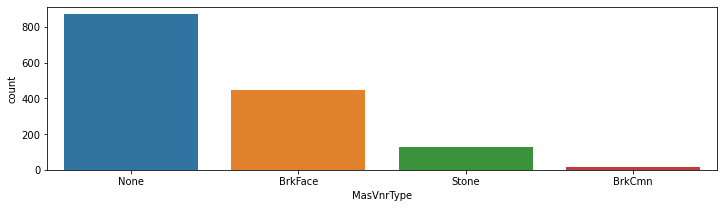

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


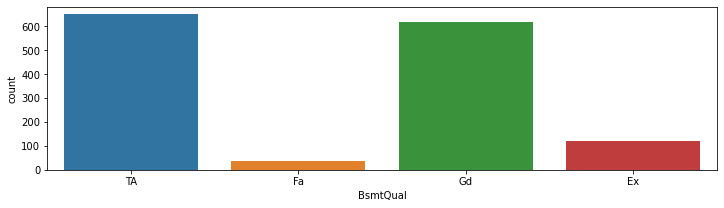

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


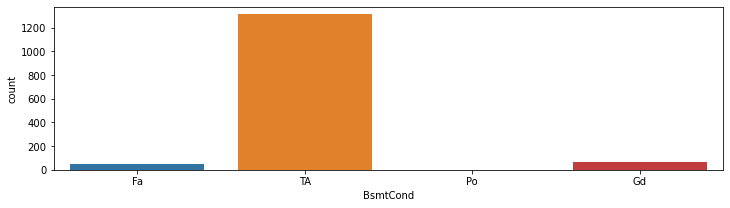

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


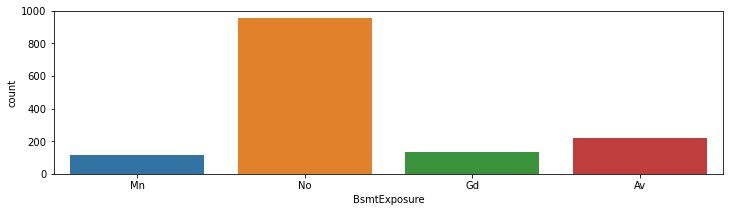

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


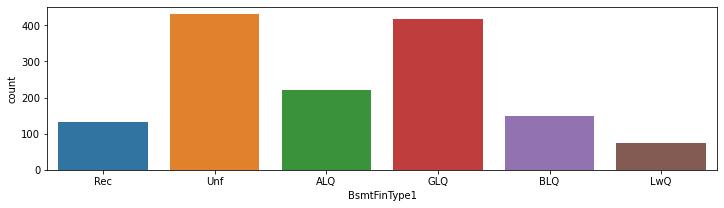

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


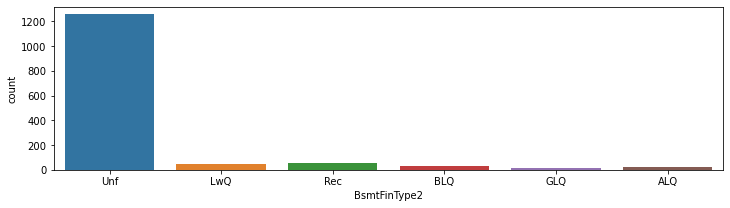

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


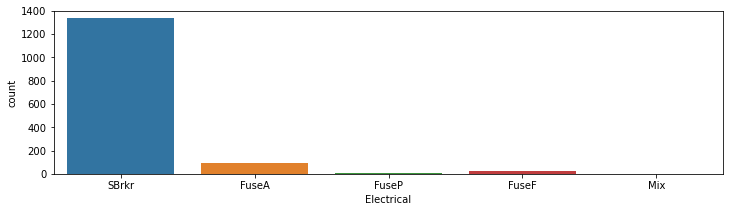

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


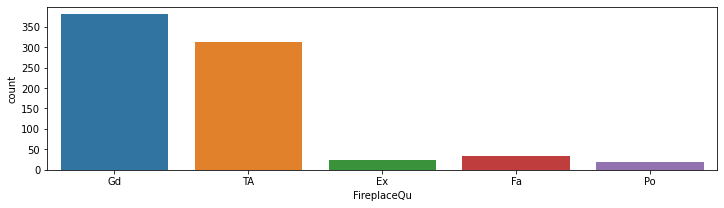

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


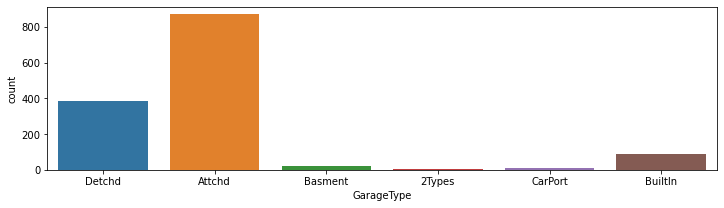

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


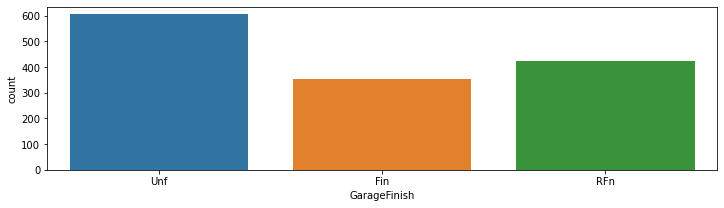

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


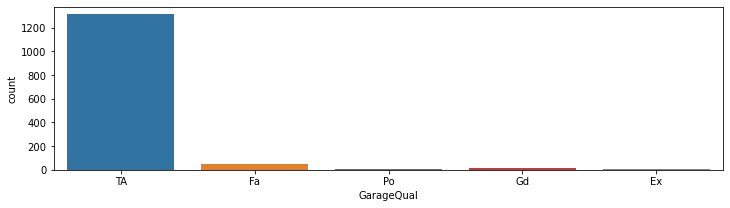

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


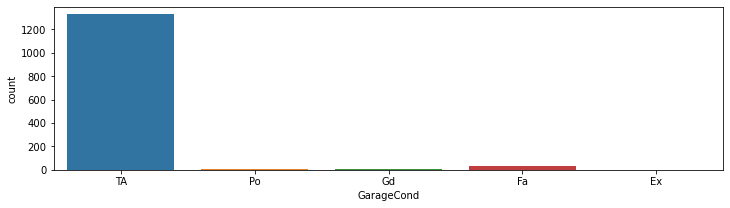

In [16]:
for col1 in var_category:
    pltbox(data_df,col1)

In [63]:
for cols in  var_category:
    data_df[cols]=data_df[cols].fillna(value='Unknown')

In [64]:
data_df.isnull().sum().values.sum()

(1460, 76)

In [66]:
X=data_df.iloc[:,:-1]
y=data_df.iloc[:,-1]

In [67]:
var_c=[var_c for var_c in X if X[var_c].dtype=='O']
for vars_encode in var_c:
    Parchnum={ni:indi for indi,ni in enumerate(set(X[vars_encode]))}
    X[vars_encode]=[Parchnum[ni] for ni in X[vars_encode]]

In [68]:
X.shape

(1460, 75)

In [69]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X=mms.fit_transform(X)

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [71]:
X_train.shape

(1022, 75)

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.optimizers import Adam

In [116]:
classifier=Sequential()
classifier.add(tf.keras.Input(shape=(X.shape[1],)))
classifier.add(Dense(units=480,kernel_initializer='he_normal',activation='relu'))
classifier.add(Dense(units=384,kernel_initializer='he_normal',activation='relu'))
classifier.add(Dense(units=384,kernel_initializer='he_normal',activation='relu'))
classifier.add(Dense(units=416,kernel_initializer='he_normal',activation='relu'))
classifier.add(Dense(units=128,kernel_initializer='he_normal',activation='relu'))
classifier.add(Dense(units=416,kernel_initializer='he_normal',activation='relu'))
classifier.add(Dense(units=512,kernel_initializer='he_normal',activation='relu'))
classifier.add(Dense(units=32,kernel_initializer='he_normal',activation='relu'))
classifier.add(Dense(units=32,kernel_initializer='he_normal',activation='relu'))
classifier.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=384,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=256,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=448,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=448,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=384,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=352,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=320,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=320,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,activation='linear'))
opt=Adam(learning_rate=0.01)
classifier.compile(optimizer=opt,loss='mae')

In [117]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 480)               36480     
_________________________________________________________________
dense_25 (Dense)             (None, 384)               184704    
_________________________________________________________________
dense_26 (Dense)             (None, 384)               147840    
_________________________________________________________________
dense_27 (Dense)             (None, 416)               160160    
_________________________________________________________________
dense_28 (Dense)             (None, 128)               53376     
_________________________________________________________________
dense_29 (Dense)             (None, 416)               53664     
_________________________________________________________________
dense_30 (Dense)             (None, 512)              

In [118]:
model=classifier.fit(X_train,y_train,batch_size=50,epochs=1000)

Epoch 1/1000
21/21 [==============================] - 1s 13ms/step - loss: 4263495.4233
Epoch 2/1000
21/21 [==============================] - 0s 13ms/step - loss: 141191.6822
Epoch 3/1000
21/21 [==============================] - 0s 13ms/step - loss: 62392.2154
Epoch 4/1000
21/21 [==============================] - 0s 13ms/step - loss: 67373.0598
Epoch 5/1000
21/21 [==============================] - 0s 13ms/step - loss: 29493.7469
Epoch 6/1000
21/21 [==============================] - 0s 16ms/step - loss: 32766.6776
Epoch 7/1000
21/21 [==============================] - 0s 13ms/step - loss: 30676.0793
Epoch 8/1000
21/21 [==============================] - 0s 15ms/step - loss: 23791.0816
Epoch 9/1000
21/21 [==============================] - 0s 13ms/step - loss: 29584.4486
Epoch 10/1000
21/21 [==============================] - 0s 14ms/step - loss: 31491.5154
Epoch 11/1000
21/21 [==============================] - 0s 14ms/step - loss: 23717.5963: 0s - loss: 22432
Epoch 12/1000
21/21 [==========

21/21 [==============================] - 0s 9ms/step - loss: 9347.8119
Epoch 188/1000
21/21 [==============================] - 0s 9ms/step - loss: 10989.7686
Epoch 189/1000
21/21 [==============================] - 0s 13ms/step - loss: 13965.4206
Epoch 190/1000
21/21 [==============================] - 0s 12ms/step - loss: 12197.2329
Epoch 191/1000
21/21 [==============================] - 0s 11ms/step - loss: 16069.1407
Epoch 192/1000
21/21 [==============================] - 0s 10ms/step - loss: 10635.3685
Epoch 193/1000
21/21 [==============================] - 0s 10ms/step - loss: 12237.8746
Epoch 194/1000
21/21 [==============================] - 0s 9ms/step - loss: 9946.4019
Epoch 195/1000
21/21 [==============================] - 0s 9ms/step - loss: 10548.5351
Epoch 196/1000
21/21 [==============================] - 0s 9ms/step - loss: 13952.9518
Epoch 197/1000
21/21 [==============================] - 0s 9ms/step - loss: 13645.6530
Epoch 198/1000
21/21 [==============================] -

21/21 [==============================] - 0s 11ms/step - loss: 7853.4577 0s - loss: 7973.
Epoch 374/1000
21/21 [==============================] - 0s 10ms/step - loss: 10229.7658
Epoch 375/1000
21/21 [==============================] - 0s 13ms/step - loss: 7485.5051
Epoch 376/1000
21/21 [==============================] - 0s 11ms/step - loss: 6744.0181
Epoch 377/1000
21/21 [==============================] - 0s 14ms/step - loss: 11553.4440
Epoch 378/1000
21/21 [==============================] - 0s 11ms/step - loss: 7409.8588
Epoch 379/1000
21/21 [==============================] - 0s 10ms/step - loss: 8360.4472
Epoch 380/1000
21/21 [==============================] - 0s 14ms/step - loss: 11680.0198
Epoch 381/1000
21/21 [==============================] - 0s 15ms/step - loss: 10074.8387
Epoch 382/1000
21/21 [==============================] - 0s 14ms/step - loss: 10393.4022
Epoch 383/1000
21/21 [==============================] - 0s 11ms/step - loss: 7750.5087
Epoch 384/1000
21/21 [==============

21/21 [==============================] - 0s 10ms/step - loss: 6732.3324
Epoch 561/1000
21/21 [==============================] - 0s 10ms/step - loss: 7023.6310
Epoch 562/1000
21/21 [==============================] - 0s 10ms/step - loss: 9265.8966
Epoch 563/1000
21/21 [==============================] - 0s 10ms/step - loss: 7052.6258
Epoch 564/1000
21/21 [==============================] - 0s 10ms/step - loss: 6974.3195
Epoch 565/1000
21/21 [==============================] - 0s 10ms/step - loss: 7817.4266
Epoch 566/1000
21/21 [==============================] - 0s 13ms/step - loss: 6751.5357
Epoch 567/1000
21/21 [==============================] - 0s 11ms/step - loss: 7424.1506
Epoch 568/1000
21/21 [==============================] - 0s 11ms/step - loss: 10808.2639
Epoch 569/1000
21/21 [==============================] - 0s 13ms/step - loss: 11827.6261
Epoch 570/1000
21/21 [==============================] - 0s 11ms/step - loss: 10373.5206
Epoch 571/1000
21/21 [==============================] -

21/21 [==============================] - 0s 11ms/step - loss: 7185.4297
Epoch 748/1000
21/21 [==============================] - 0s 11ms/step - loss: 13187.5764
Epoch 749/1000
21/21 [==============================] - 0s 11ms/step - loss: 7037.9176
Epoch 750/1000
21/21 [==============================] - 0s 11ms/step - loss: 7043.3534 0s - loss: 6
Epoch 751/1000
21/21 [==============================] - 0s 11ms/step - loss: 10810.9052
Epoch 752/1000
21/21 [==============================] - 0s 11ms/step - loss: 10213.8431
Epoch 753/1000
21/21 [==============================] - 0s 12ms/step - loss: 7751.8496
Epoch 754/1000
21/21 [==============================] - 0s 11ms/step - loss: 8084.8809
Epoch 755/1000
21/21 [==============================] - 0s 10ms/step - loss: 11682.2166
Epoch 756/1000
21/21 [==============================] - 0s 10ms/step - loss: 16248.5153
Epoch 757/1000
21/21 [==============================] - 0s 10ms/step - loss: 11523.4301
Epoch 758/1000
21/21 [=================

21/21 [==============================] - 0s 15ms/step - loss: 4544.7948
Epoch 935/1000
21/21 [==============================] - 0s 12ms/step - loss: 4972.5073 0s - loss: 466
Epoch 936/1000
21/21 [==============================] - 0s 12ms/step - loss: 6538.3782
Epoch 937/1000
21/21 [==============================] - 0s 12ms/step - loss: 6643.7908
Epoch 938/1000
21/21 [==============================] - 0s 12ms/step - loss: 10698.1604
Epoch 939/1000
21/21 [==============================] - 0s 12ms/step - loss: 6227.0265
Epoch 940/1000
21/21 [==============================] - 0s 13ms/step - loss: 7988.8703
Epoch 941/1000
21/21 [==============================] - 0s 12ms/step - loss: 7610.8690
Epoch 942/1000
21/21 [==============================] - 0s 12ms/step - loss: 6168.8083
Epoch 943/1000
21/21 [==============================] - 0s 12ms/step - loss: 4686.9021 0s - loss: 4664.05
Epoch 944/1000
21/21 [==============================] - 0s 12ms/step - loss: 5253.1272
Epoch 945/1000
21/21 [=

In [119]:
from sklearn.metrics import mean_absolute_error
y_pred = classifier.predict(X_test, verbose=0)
mean_absolute_error(y_test, y_pred)

19319.628522759704

In [120]:
from sklearn.metrics import accuracy_score,mean_squared_error
mean_squared_error(y_test,y_pred)

1464748515.0736496

In [121]:
from math import sqrt
sqrt(mean_squared_error(y_test,y_pred))

38272.033066896896

In [33]:
data_test=pd.read_csv(r'C:\Users\wlpch\Documents\sab\house-prices-advanced-regression-techniques\test.csv')

In [83]:
data_dup_test=pd.read_csv(r'C:\Users\wlpch\Documents\sab\house-prices-advanced-regression-techniques\test.csv')

In [34]:
null_columns=data_test.columns[data_test.isnull().any()]
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [35]:
data_test.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [36]:
data_test['GarageYrBlt']=data_test['GarageYrBlt'].fillna(value=data_test['GarageYrBlt'].mode()[0]).astype(int)

In [37]:
data_test['MasVnrArea']=data_test['MasVnrArea'].fillna(method='bfill')
data_test['MasVnrArea']=data_test['MasVnrArea'].fillna(method='ffill')
data_test['MasVnrType']=data_test['MasVnrType'].fillna(method='bfill')
data_test['MasVnrType']=data_test['MasVnrType'].fillna(method='ffill')
data_test['LotFrontage']=data_test['LotFrontage'].fillna(method='bfill')
data_test['LotFrontage']=data_test['LotFrontage'].fillna(method='ffill')

In [38]:
null_columns=data_test.columns[data_test.isnull().any()]
null_columns

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [39]:
var_catego=[var_catego for var_catego in data_test[null_columns] if data_test[var_catego].dtype=='O']

In [40]:
for cols in  var_catego:
    data_test[cols]=data_test[cols].fillna(value='Unknown')

In [41]:
null_columns=data_test.columns[data_test.isnull().any()]
null_columns

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'GarageCars', 'GarageArea'],
      dtype='object')

In [42]:
data_test['BsmtFinSF1']=data_test['BsmtFinSF1'].fillna(data_test['BsmtFinSF1'].mean())
data_test['BsmtFinSF2']=data_test['BsmtFinSF2'].fillna(data_test['BsmtFinSF2'].mean())
data_test['BsmtUnfSF']=data_test['BsmtUnfSF'].fillna(data_test['BsmtUnfSF'].mean())
data_test['TotalBsmtSF']=data_test['TotalBsmtSF'].fillna(data_test['TotalBsmtSF'].mean())
data_test['BsmtFullBath']=data_test['BsmtFullBath'].fillna(data_test['BsmtFullBath'].mean())
data_test['BsmtHalfBath']=data_test['BsmtHalfBath'].fillna(data_test['BsmtHalfBath'].mean())
data_test['GarageCars']=data_test['GarageCars'].fillna(data_test['GarageCars'].mean())
data_test['GarageArea']=data_test['GarageArea'].fillna(data_test['GarageArea'].mean())

In [43]:
var_ca=[var_ca for var_ca in data_test if data_test[var_ca].dtype=='O']
for vars_encode in var_ca:
    Parchnum={ni:indi for indi,ni in enumerate(set(data_test[vars_encode]))}
    data_test[vars_encode]=[Parchnum[ni] for ni in data_test[vars_encode]]

In [44]:
data_test.shape

(1459, 75)

In [ ]:
data_test.columns

In [80]:
data_test=mms.fit_transform(data_test)

In [81]:
data_test.shape

(1459, 75)

In [122]:
y_pred_test = classifier.predict(data_test, verbose=0)

In [123]:
data_dup_test.Id.shape

(1459,)

In [124]:
y_pred_test

array([[133385.7 ],
       [210029.36],
       [217987.58],
       ...,
       [191997.94],
       [121714.09],
       [229353.52]], dtype=float32)

In [125]:
import itertools
merged = list(itertools.chain.from_iterable(y_pred_test))

In [126]:
merged

[133385.7,
 210029.36,
 217987.58,
 244673.97,
 264873.94,
 198019.66,
 179153.6,
 188210.05,
 219036.28,
 136092.52,
 263876.97,
 104433.164,
 104948.28,
 155782.16,
 120153.164,
 476978.97,
 318116.03,
 325324.5,
 344858.47,
 610821.5,
 391493.28,
 241694.98,
 217605.86,
 194014.89,
 215216.39,
 226656.77,
 412968.5,
 268790.9,
 277179.16,
 250353.5,
 247933.11,
 88583.04,
 199019.25,
 333974.4,
 323891.97,
 250858.39,
 217585.05,
 162915.2,
 167074.78,
 189101.97,
 241925.11,
 188974.33,
 316078.4,
 272500.28,
 257988.73,
 226579.56,
 283627.38,
 210931.67,
 188806.47,
 185131.02,
 153905.36,
 207777.17,
 127794.69,
 167894.33,
 254028.02,
 190803.1,
 200825.67,
 130039.04,
 292795.1,
 154487.94,
 158149.61,
 189945.16,
 128046.664,
 134860.89,
 140805.25,
 136881.05,
 139673.42,
 142361.27,
 167296.33,
 192490.16,
 132075.39,
 91978.18,
 159258.8,
 167012.33,
 173506.42,
 117518.71,
 86565.13,
 164208.2,
 234488.36,
 110188.13,
 166849.67,
 150443.2,
 193674.14,
 102889.7,
 127987.

In [127]:
output=pd.DataFrame({'Id':data_dup_test.Id,'SalePrice':merged})

In [128]:
output.to_csv(r'C:\Users\wlpch\Documents\sab\house-prices-advanced-regression-techniques\deepSubmission.csv',index=False)

In [109]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='relu'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics='mean_absolute_error')
    return model

In [110]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3)

In [111]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [112]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 02s]
val_mean_absolute_error: 44427.385416666664

Best val_mean_absolute_error So Far: 44427.385416666664
Total elapsed time: 00h 00m 14s
INFO:tensorflow:Oracle triggered exit


In [114]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 4
units_0: 448
units_1: 128
learning_rate: 0.01
units_2: 64
units_3: 352
units_4: 192
units_5: 352
units_6: 416
units_7: 384
units_8: 320
units_9: 160
units_10: 288
units_11: 224
Score: 44427.385416666664
Trial summary
Hyperparameters:
num_layers: 5
units_0: 384
units_1: 160
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
Score: 100138.19010416667
Trial summary
Hyperparameters:
num_layers: 5
units_0: 96
units_1: 352
learning_rate: 0.001
units_2: 128
units_3: 64
units_4: 448
units_5: 384
units_6: 384
units_7: 64
units_8: 480
units_9: 480
units_10: 416
units_11: 512
Score: 184080.71875
Trial summary
Hyperparameters:
num_layers: 12
units_0: 64
units_1: 288
learning_rate: 0.0001
units_2: 160
units_3: 288
units_4: 64
units_5: 320
units_6: 288
units_7: 320
units_8: 32
units_9: 32
units_10: 32
units_11: 32
Score: 184